In [ ]:
!pip install transformers scikit-learn torch matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/Clustering/DocumentEmbedding
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/Clustering/DocumentEmbedding
qa.jsonl


In [ ]:
import json

# Load your JSONL file
documents = []
with open('qa.jsonl', 'r') as file:
    for line in file:
        documents.append(json.loads(line))

# Print the first document
print(documents[0])

{'question': "In the case of Nasr v NRMA Insurance [2006] NSWSC 1018, why was the plaintiff's appeal lodged out of time?", 'answer': "In Nasr v NRMA Insurance [2006] NSWSC 1018, the plaintiff's appeal was lodged out of time because the summons was filed on 8 June 2006, seven months after the decision of the Local Court was made on 4 October 2005. No explanation was provided for this delay.", 'prompt': "# Snippet\nThe snippet from an Australian legal document from which you must synthesise a question and answer is provided below.\n<document_metadata>\n<document_title>Nasr v NRMA Insurance [2006] NSWSC 1018</document_title>\n<document_jurisdiction>New South Wales</document_jurisdiction>\n<document_type>Decision</document_type>\n</document_metadata>\n<snippet>\n 3 The plaintiff claims that he was overseas when the Local Court struck out his case against the NRMA and they (the NRMA) rejected payment of his claim for his car after it was burnt on 6 July 2004. There are no grounds of appeal 

Create Simple TF-IDF vectors for embeddings. While TF-IDF vectors are not as sophisticated as BERT embeddings, they can still be effective for many clustering tasks, especially with text data.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine the contents of each document into a single string
combined_documents = [' '.join(str(element) for element in doc.values()) for doc in documents]

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features

# Generate TF-IDF vectors for each document
tfidf_vectors = vectorizer.fit_transform(combined_documents)

# Check the shape of the TF-IDF vectors
tfidf_vectors.shape

(2124, 5000)

Create clusters using Kmeans clustering of the vectors

In [ ]:
from sklearn.cluster import KMeans

# Choose the number of clusters
num_clusters = 6  # Adjust based on your needs

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_assignments = kmeans.fit_predict(tfidf_vectors)

# Print cluster assignments for each document
for i, cluster in enumerate(cluster_assignments):
    print(f'Document {i} is in cluster {cluster}')

Visualize the clusters


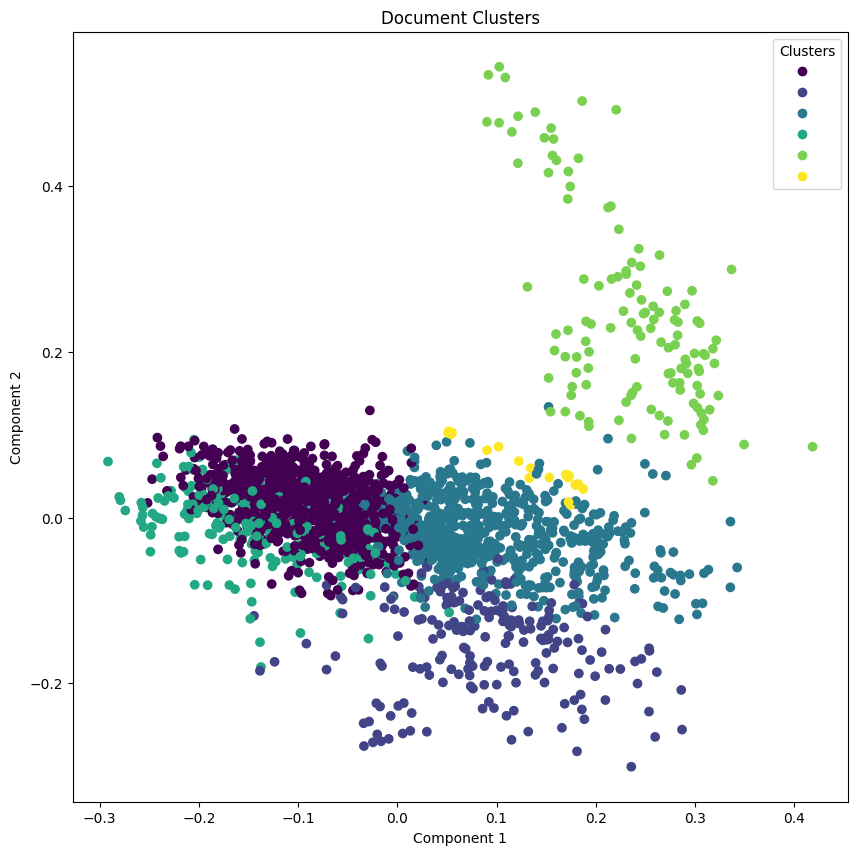

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Dimensionality reduction using PCA or t-SNE
# Choose either PCA or t-SNE based on your preference
# PCA is faster but t-SNE might give better visual separation

# Using PCA
pca = PCA(n_components=2)
reduced_vectors_pca = pca.fit_transform(tfidf_vectors.toarray())

# Using t-SNE (might be slow for large datasets)
# tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
# reduced_vectors_tsne = tsne.fit_transform(tfidf_vectors.toarray())

# Choose the method you used for further steps
reduced_vectors = reduced_vectors_pca  # or reduced_vectors_tsne

# Plotting the clusters
plt.figure(figsize=(10, 10))
scatter = plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=cluster_assignments, cmap='viridis')
plt.title('Document Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(handles=scatter.legend_elements()[0], title="Clusters")
plt.show()

In [ ]:
def get_top_terms_for_each_cluster(tfidf_vectors, cluster_assignments, num_terms=10):
    # Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Group TF-IDF vectors by cluster
    clustered_tfidf = [tfidf_vectors[cluster_assignments == i] for i in range(num_clusters)]

    top_terms = {}
    for i, cluster in enumerate(clustered_tfidf):
        # Get the mean TF-IDF score for each feature (word)
        mean_tfidf = np.array(cluster.mean(axis=0)).flatten()

        # Sort features by score and get the top terms
        top_features = mean_tfidf.argsort()[::-1][:num_terms]
        top_features_terms = [feature_names[j] for j in top_features]
        top_terms[f'Cluster {i}'] = top_features_terms

    return top_terms

# Get top terms for each cluster
top_terms = get_top_terms_for_each_cluster(tfidf_vectors, cluster_assignments)

# Display top terms for each cluster
for cluster, terms in top_terms.items():
    print(f"{cluster}: {', '.join(terms)}")

Cluster 0: the, of, to, and, in, that, snippet, must, it, question
Cluster 1: the, of, and, to, snippet, must, ltd, question, pty, from
Cluster 2: the, of, to, and, snippet, in, or, must, from, question
Cluster 3: the, to, of, tribunal, and, in, that, applicant, snippet, appellant
Cluster 4: the, ad, of, to, aviation, and, airworthiness, in, directive, requirement
Cluster 5: the, tariff, column, concession, table, of, order, revocation, in, customs
